In [102]:
# Gerekli kütüphaneleri içe aktaralım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline


In [103]:
df = pd.read_csv("15-gym_crowdedness.csv")

In [104]:
df.head(3)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17


In [105]:
df.shape

(62184, 11)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [107]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [108]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [109]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [110]:
df["date"] = pd.to_datetime(df["date"], utc= True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   number_people         62184 non-null  int64              
 1   date                  62184 non-null  datetime64[ns, UTC]
 2   timestamp             62184 non-null  int64              
 3   day_of_week           62184 non-null  int64              
 4   is_weekend            62184 non-null  int64              
 5   is_holiday            62184 non-null  int64              
 6   temperature           62184 non-null  float64            
 7   is_start_of_semester  62184 non-null  int64              
 8   is_during_semester    62184 non-null  int64              
 9   month                 62184 non-null  int64              
 10  hour                  62184 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(9)
memory usage: 5.2 M

In [112]:
df["year"] = df["date"].dt.year

In [113]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17,2015
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17,2015
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17,2015
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17,2015
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17,2015


In [114]:
df["year"].unique()

array([2015, 2016, 2017], dtype=int32)

In [115]:
df.drop("date", axis=1 , inplace=True)

Text(0.5, 1.0, 'saatlik ort insan sayısı')

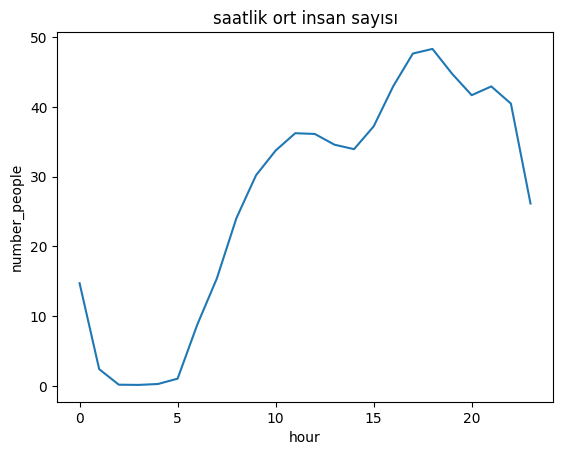

In [116]:
sns.lineplot(data=df, x="hour", y="number_people", errorbar=None)
plt.title("saatlik ort insan sayısı")

In [117]:
df.drop("timestamp", axis=1 , inplace=True)

In [118]:
X = df.drop("number_people" , axis=1)
y = df["number_people"]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=15)

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [121]:
def cal_model_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2score = r2_score(true,predicted)
    return mae, mse, rmse, r2score

In [129]:
models = {
        "LinearRegression" : LinearRegression(),
        "Lasso" : Lasso(),
        "Ridge" : Ridge(),
        "K-Neigbors Regressor" : KNeighborsRegressor(),
        "Decision Tree " : DecisionTreeRegressor(),
        "Random Forest" : RandomForestRegressor()

} # regression models

In [131]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train) # train datasındanda accuracysini almak için train aşırı yüksek test düşükse overfitting fazla 
    y_test_pred = model.predict(X_test)

    model_train_mae,model_train_mse, model_train_rmse, model_train_r2 = cal_model_metrics(y_train, y_train_pred)
    model_test_mae,model_test_mse, model_test_rmse, model_test_r2 = cal_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("---------------------------------")

    print("Evaluation for Training Set")
    print("Mean Absolute Error: ",  model_train_mae)
    print("Mean Square Error: ",  model_train_mse)
    print("RMSE: ",  model_train_rmse)
    print("R2 Score: ",  model_train_r2)
    print("---------------------------------")

    print("Evaluation for Test Set")
    print("Mean Absolute Error: ",  model_test_mae)
    print("Mean Square Error: ",  model_test_mse)
    print("RMSE: ",  model_test_rmse)
    print("R2 Score: ",  model_test_r2)
    print("---------------------------------")
    print("\n")

LinearRegression()
---------------------------------
Evaluation for Training Set
Mean Absolute Error:  10.736278545598953
Mean Square Error:  205.15013531793224
RMSE:  14.32306305641123
R2 Score:  0.5990450245502554
---------------------------------
Evaluation for Test Set
Mean Absolute Error:  10.772974414744983
Mean Square Error:  208.1786957813293
RMSE:  14.42839893339969
R2 Score:  0.6011719749263869
---------------------------------


Lasso()
---------------------------------
Evaluation for Training Set
Mean Absolute Error:  11.203650794797749
Mean Square Error:  220.3757301674302
RMSE:  14.845057432271194
R2 Score:  0.5692874131325135
---------------------------------
Evaluation for Test Set
Mean Absolute Error:  11.21308889907535
Mean Square Error:  223.84537475940746
RMSE:  14.96146298860534
R2 Score:  0.5711578055473432
---------------------------------


Ridge()
---------------------------------
Evaluation for Training Set
Mean Absolute Error:  10.73626779741761
Mean Square E

In [132]:
# Hyperparameter 

In [143]:
knn_params = {"n_neighbors" : [2,3,4,5,20,40,50] }

rf_params = {
        "n_estimators" : [10,20,50,100,200,250],
        "max_depth" : [5,8,15,None],
        "max_features" : ["sqrt", "log2", 5, 7, 10],
        "min_samples_split" : [2,8,12,20],
}

In [144]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
randomcv_models = [("KNN", KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params)]

In [146]:
for name, model , params in randomcv_models:
    randomCV = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter = 100, cv= 3, n_jobs=-1)
    randomCV.fit(X_train, y_train)
    print("best params for :" , name, randomCV.best_params_ )

c:\Users\alkav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best params for : KNN {'n_neighbors': 2}
best params for : RF {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': None}


best params for : KNN {'n_neighbors': 2}
best params for : RF {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': None}

In [148]:
models = {

        "K-Neigbors Regressor" : KNeighborsRegressor(n_neighbors = 2),
        "Random Forest" : RandomForestRegressor(
            n_estimators=100,
            min_samples_split=2,
            max_features="sqrt",
            max_depth=None)

} # regression models

In [149]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train) # train datasındanda accuracysini almak için train aşırı yüksek test düşükse overfitting fazla 
    y_test_pred = model.predict(X_test)

    model_train_mae,model_train_mse, model_train_rmse, model_train_r2 = cal_model_metrics(y_train, y_train_pred)
    model_test_mae,model_test_mse, model_test_rmse, model_test_r2 = cal_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("---------------------------------")

    print("Evaluation for Training Set")
    print("Mean Absolute Error: ",  model_train_mae)
    print("Mean Square Error: ",  model_train_mse)
    print("RMSE: ",  model_train_rmse)
    print("R2 Score: ",  model_train_r2)
    print("---------------------------------")

    print("Evaluation for Test Set")
    print("Mean Absolute Error: ",  model_test_mae)
    print("Mean Square Error: ",  model_test_mse)
    print("RMSE: ",  model_test_rmse)
    print("R2 Score: ",  model_test_r2)
    print("---------------------------------")
    print("\n")

KNeighborsRegressor(n_neighbors=2)
---------------------------------
Evaluation for Training Set
Mean Absolute Error:  3.4956924278625254
Mean Square Error:  29.046435627641976
RMSE:  5.389474522404014
R2 Score:  0.9432302939214012
---------------------------------
Evaluation for Test Set
Mean Absolute Error:  4.709959262435677
Mean Square Error:  50.40734884219554
RMSE:  7.099813296291357
R2 Score:  0.9034297754989944
---------------------------------


RandomForestRegressor(max_features='sqrt')
---------------------------------
Evaluation for Training Set
Mean Absolute Error:  3.166082765288126
Mean Square Error:  21.77127838444348
RMSE:  4.665970251131428
R2 Score:  0.9574491999402495
---------------------------------
Evaluation for Test Set
Mean Absolute Error:  4.329075828259771
Mean Square Error:  41.50674912167576
RMSE:  6.4425731755002795
R2 Score:  0.9204815136472358
---------------------------------


